In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("/kaggle/input/food-delivery-route-efficiency-dataset/Food_Delivery_Route_Efficiency_Dataset.csv")

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df['order_time'] = pd.to_datetime(df['order_time'],errors='coerce')

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.drop(columns="order_id").describe()

In [ ]:
df.describe(include=[float, int])

In [ ]:
df["hour"] = df["order_time"].dt.hour

In [ ]:
df["day"] = df["order_time"].dt.day
df["weekday"] = df["order_time"].dt.weekday

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
#average delivery time by hour
df.groupby('hour')['delivery_time_min'].mean()

In [ ]:
#delivery count by weekday
df['weekday'].value_counts()

In [ ]:
#average distance by day
df.groupby('day')['distance_km'].mean()

Since the average distance stays around 6 to 7 km on every day, it means:

The delivery service usually operates within the same approximate radius every day.
Customers are mostly located at similar distances from restaurants.
There is no big change in delivery distance across different days.

So the “service area” is stable.

In [ ]:
df.head()

In [ ]:
# Compare delivery time by traffic level
df.groupby('traffic_level')['delivery_time_min'].mean()

In [ ]:
# Compare delivery time dy delivery mode
df.groupby('delivery_mode')['delivery_time_min'].mean()

In [ ]:
# Compare delivery time by weather
df.groupby('weather')['delivery_time_min'].mean()

In [ ]:
#Creating a new feature : time_per_km
df["time_per_km"] = df["delivery_time_min"] / df["route_length_km"]

In [ ]:
df.groupby('traffic_level')['time_per_km'].mean()

In [ ]:
df[["distance_km","route_length_km","delivery_time_min","time_per_km"]].corr()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[["distance_km","route_length_km","delivery_time_min","time_per_km"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [ ]:
df.plot.scatter(x="route_length_km", y="delivery_time_min")

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
model.fit(df[["route_length_km"]], df["delivery_time_min"])


In [ ]:
model.score(df[["route_length_km"]], df["delivery_time_min"])

In [ ]:
df_encoded = pd.get_dummies(df, columns=['traffic_level','delivery_mode','weather'], drop_first = True)

In [32]:
df_encoded.head()

,order_id,distance_km,delivery_time_min,route_length_km,order_time,restaurant_zone,customer_zone,hour,day,weekday,time_per_km,traffic_level_Low,traffic_level_Medium,delivery_mode_Bike,delivery_mode_Car,delivery_mode_Scooter,weather_Cloudy,weather_Rainy,weather_Windy
0,1,7.97,63.8,9.75,2025-01-01 15:29:00,South,North,15,1,2,6.543590,False,False,False,False,False,False,False,False
1,2,0.90,7.6,1.28,2025-01-03 00:47:00,West,North,0,3,4,5.937500,False,False,False,True,False,True,False,False
2,3,11.12,78.0,16.65,2025-01-04 17:32:00,South,Central,17,4,5,4.684685,False,True,True,False,False,False,True,False
3,4,4.90,24.8,5.25,2025-01-01 14:12:00,Central,Central,14,1,2,4.723810,True,False,False,False,True,False,True,False
4,5,10.04,56.0,11.34,2025-01-02 16:50:00,West,North,16,2,3,4.938272,False,False,False,True,False,False,True,False


In [ ]:
df_encoded.drop("delivery_time_min", axis=1)

In [46]:
x = df_encoded[["route_length_km","distance_km","hour","weekday",
"delivery_mode_Bike","delivery_mode_Car","delivery_mode_Scooter",
"traffic_level_Low","traffic_level_Medium",
"weather_Cloudy","weather_Rainy","weather_Windy"]]

In [34]:
y = df_encoded['delivery_time_min']

In [47]:
x.head()

,route_length_km,distance_km,hour,weekday,delivery_mode_Bike,delivery_mode_Car,delivery_mode_Scooter,traffic_level_Low,traffic_level_Medium,weather_Cloudy,weather_Rainy,weather_Windy
0,9.75,7.97,15,2,False,False,False,False,False,False,False,False
1,1.28,0.90,0,4,False,True,False,False,False,True,False,False
2,16.65,11.12,17,5,True,False,False,False,True,False,True,False
3,5.25,4.90,14,2,False,False,True,True,False,False,True,False
4,11.34,10.04,16,3,False,True,False,False,False,False,True,False


In [37]:
#Train a basic linear regression
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [49]:
pd.Series(model.coef_, index=X.columns)

route_length_km          4.120677
distance_km              1.839287
hour                     0.076612
weekday                  0.313905
delivery_mode_Bike      -1.449155
delivery_mode_Car        0.637492
delivery_mode_Scooter   -0.138539
traffic_level_Low        1.604882
traffic_level_Medium     1.425164
weather_Cloudy           0.888753
weather_Rainy            0.237918
weather_Windy            0.282754
dtype: float64

In [51]:
model.score(x,y)

0.9014957454485124

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8770821851414515

In [53]:
x.head()

,route_length_km,distance_km,hour,weekday,delivery_mode_Bike,delivery_mode_Car,delivery_mode_Scooter,traffic_level_Low,traffic_level_Medium,weather_Cloudy,weather_Rainy,weather_Windy
0,9.75,7.97,15,2,False,False,False,False,False,False,False,False
1,1.28,0.90,0,4,False,True,False,False,False,True,False,False
2,16.65,11.12,17,5,True,False,False,False,True,False,True,False
3,5.25,4.90,14,2,False,False,True,True,False,False,True,False
4,11.34,10.04,16,3,False,True,False,False,False,False,True,False


## Creating new model by removing unwanted features and then train the model with few features 

In [54]:
X2 = df_encoded[["route_length_km","distance_km",
"delivery_mode_Bike","delivery_mode_Car","delivery_mode_Scooter",
"traffic_level_Low","traffic_level_Medium"]]

In [55]:
y = df_encoded["delivery_time_min"]

In [60]:
X2_train, X2_test, y2_train,y2_test = train_test_split(X2,y,test_size=0.2, random_state=42)

In [61]:
model2 = LinearRegression()

In [62]:
model2.fit(X2_train, y2_train)

LinearRegression()

In [63]:
model2.score(X2_test, y2_test)

0.8801517601787363

### Try a tree-based model
RandomForestRegressor or GradientBoostingRegressor never assume linearity.
You will see whether a non-linear model does better.

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X2_train, y_train)
model_rf.score(X2_test, y_test)

0.7970012089888542

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

In [69]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X2_train, y_train)
gbr.score(X2_test, y_test)

0.8116661273796157

## Clean conclusion
## When the relationship is strong and linear, linear models outperform tree models and boosters.

In [71]:
y2_pred = model2.predict(X2_test)
residuals = y2_test - y2_pred

In [72]:
import matplotlib.pyplot as plt

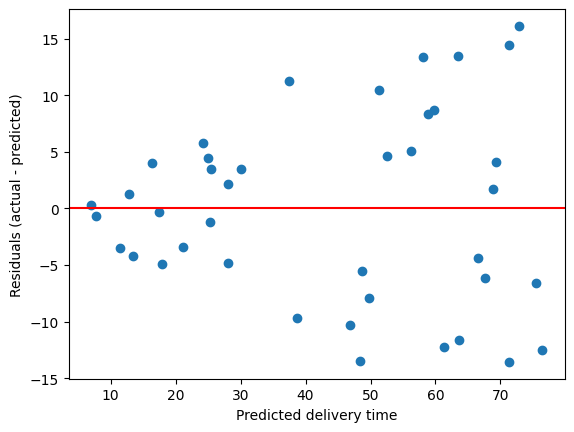

In [73]:
plt.scatter(y_pred, residuals)
plt.axhline(0, color="red")
plt.xlabel("Predicted delivery time")
plt.ylabel("Residuals (actual - predicted)")
plt.show()

## Final insights we got 
1- Delivery time is driven mainly by route length
   Every extra kilometre adds about 4 minutes.
   This single feature explains most of the variation in delivery time.

2- Distance (straight-line) has a smaller but real effect
Even after accounting for route length, distance_km adds extra information.
Probably reflects city layout or turns.

3- Traffic level has a small influence
Low and Medium traffic add 1–1.6 minutes compared to High.
Traffic does not strongly affect delivery time in this dataset.

4- Delivery mode matters but not much
Bike is slightly faster than Bicycle.
Car is slightly slower.
Scooter effect is almost zero.
Differences are small — route length dominates.

5- Weather has almost no effect
Cloudy, Rainy, Windy barely change delivery time.
Weather is not a useful predictor here.

6- Time features (hour, weekday) add no value
Removing them improved model performance.
So time-of-day and day-of-week patterns are weak or absent.

7- The linear model is best for this dataset
R² ≈ 0.88 on test data.
Tree models and boosters perform worse, confirming the relationship is mostly linear.

8- Residual analysis
Model is stable.
No systematic pattern in errors.
Slight increase in error for long deliveries, which is normal.

Overall conclusion
Delivery duration in this dataset is predictable, strongly linear, and depends almost entirely on route length and distance. Traffic, weather, mode, and timing have only minor effects.